<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/IBM%20Quantum%20Challenge%202024/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2f47cf5a4e51db14e590e9552b46b5fe76785fbb9fc5e28e6cb19c24fb26c6c2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.5 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-ony4brnf
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-ony4brnf
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 96253489893ffda0e53a23ad53ce5e6b992e63d2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.6 MB/s eta 0:00:00
  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 14.9 MB/s eta 0:00:

In [ ]:

# Import all in one cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import InstructionProperties
from qiskit.visualization import plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.primitives import StatevectorEstimator

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

In [2]:
%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86

env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


In [3]:
# qc-grader should be 0.18.12 (or higher)
import qc_grader

qc_grader.__version__

'0.18.12'

In [4]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab4_ex1,
    grade_lab4_ex2,
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6,
    grade_lab4_ex7
)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming you placed the file in your Google Drive 'My Drive' folder
birds_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/birds_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Define num_qubits, the number of qubits, for the rest of the Lab
num_qubits = 5

# Load the dictionary
birds_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/birds_dataset.csv')

# Check if the dataset is loaded correctly - coefficients should be complex numbers
for i in range(2**num_qubits):
    key = 'c%.0f' %i
    birds_dataset[key] = birds_dataset[key].astype(np.complex128)

# Print the dataset
print(birds_dataset.head())

         names                  c0                  c1                  c2  \
0       Falcon  0.707107+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
1  Hummingbird  0.000000+0.000000j  0.707107+0.000000j  0.000000+0.000000j   
2        Eagle  0.000000+0.000000j  0.000000+0.000000j  0.707107+0.000000j   
3       Osprey  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   
4        Heron  0.000000+0.000000j  0.000000+0.000000j  0.000000+0.000000j   

                   c3                  c4        c5        c6        c7  \
0  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2  0.000000+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3  0.707107+0.000000j  0.000000+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4  0.000000+0.000000j  0.707107+0.000000j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

         c8  ...       c22       c23       c24       c25       c26  \
0  0.0+0.0

In [27]:
list_coefficients = birds_dataset[[f'c{i}' for i in range(2**num_qubits)]].values.tolist() # Add your code here
list_labels =  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] # Add your code here

In [28]:
# Submit your answer using following code
grade_lab4_ex1(list_coefficients, list_labels)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


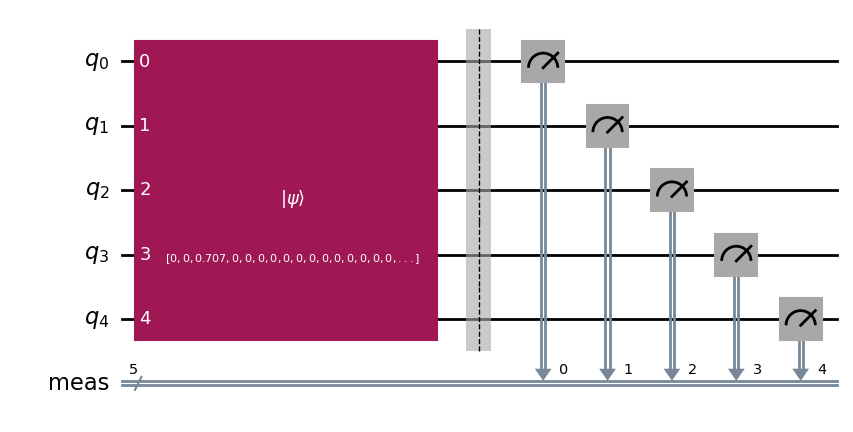

In [29]:
index_bird = 2 # You can check different birds by changing the index
amplitudes = list_coefficients[index_bird]

# Build the amplitude embedding
qc = QuantumCircuit(5)
qc.initialize(amplitudes, range(num_qubits))
qc.measure_all()

# Draw the amplitude embedding circuit
qc.draw(output="mpl")

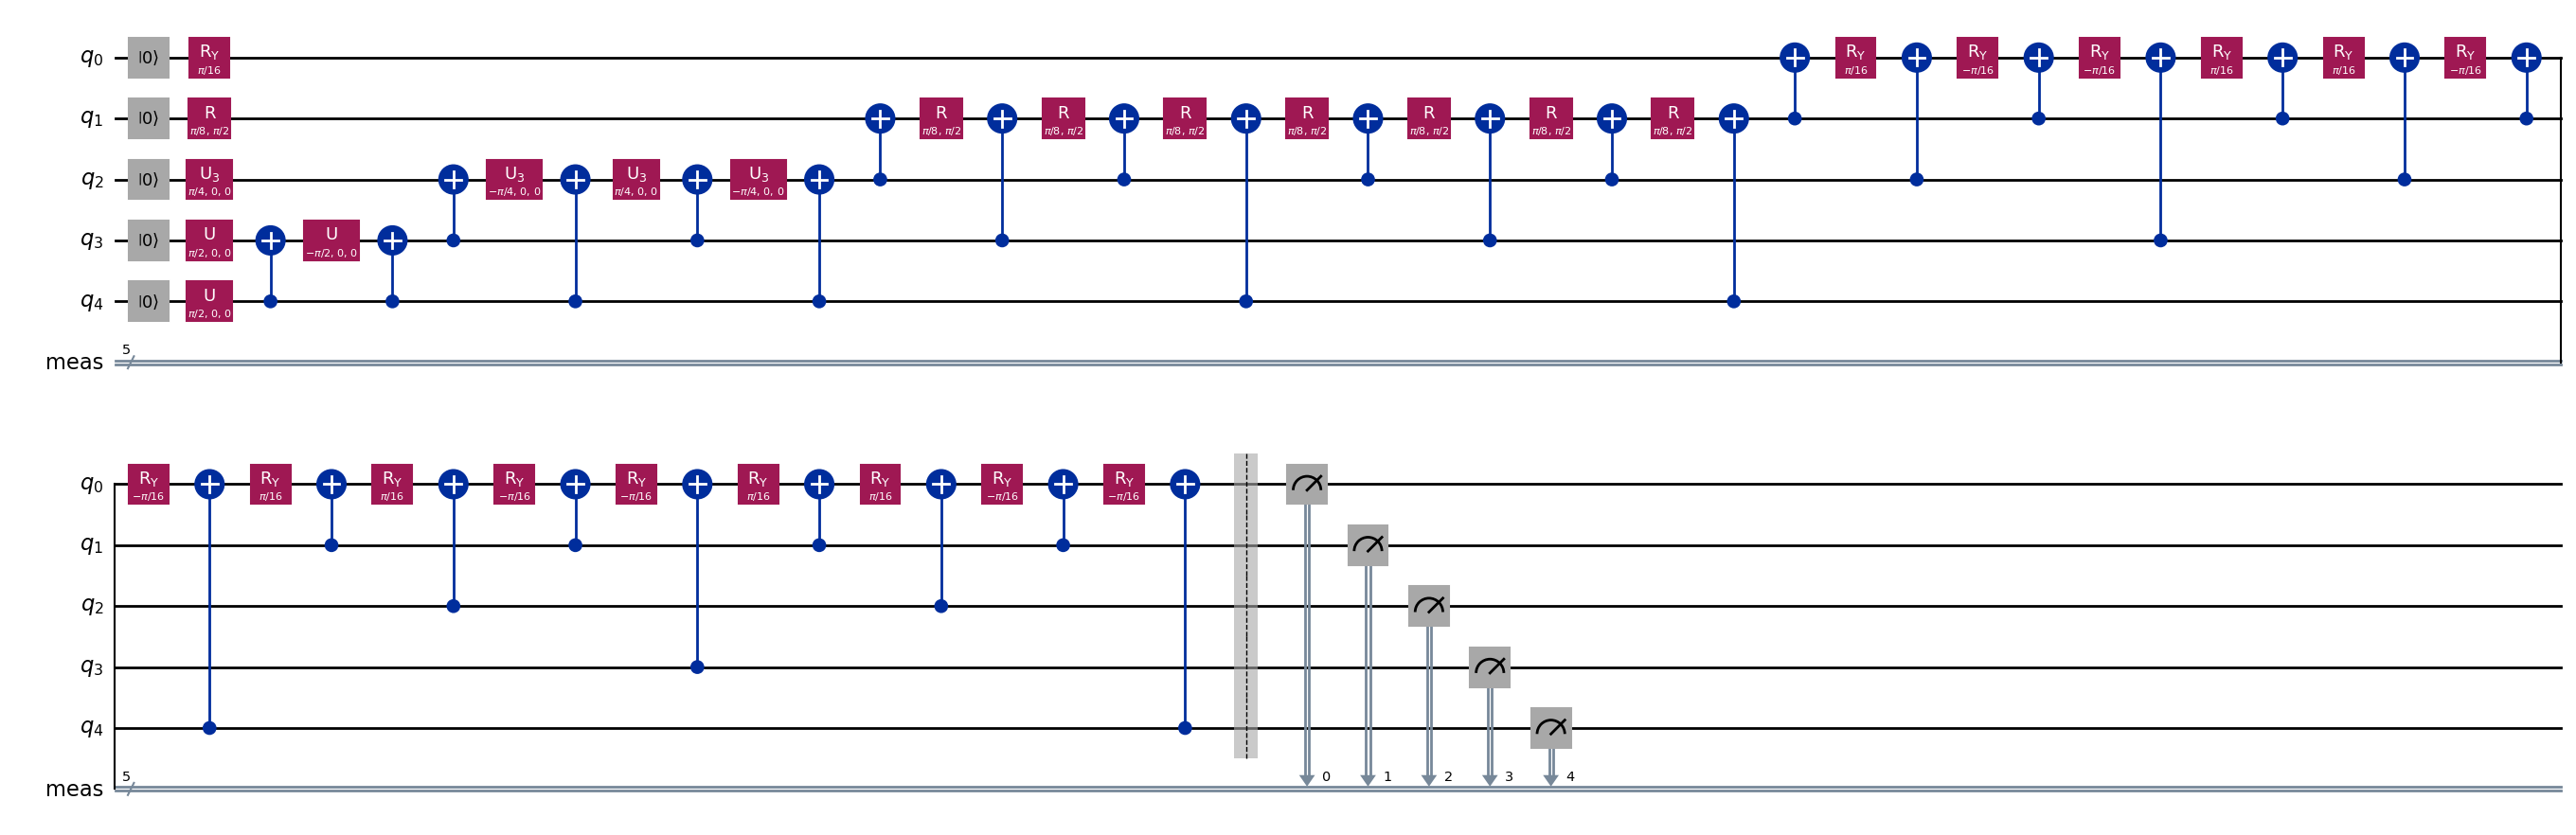

In [30]:
# Draw the decomposition of the amplitude embedding circuit
qc.decompose(reps=8).draw(output="mpl", fold=40)

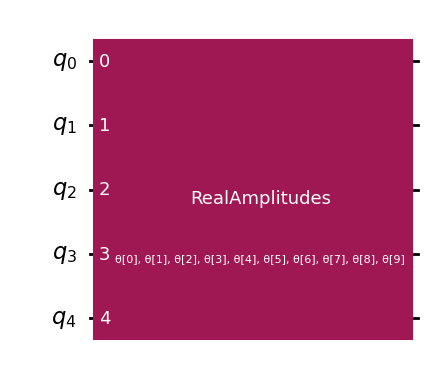

In [31]:
num_qubits =5 # Add your code here
reps = 1 # Add your code here
entanglement = "full"# Add your code here
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement) # Add your code here
# Add code here to draw the ansatz circuit
ansatz.draw(output='mpl')

In [32]:
# Submit your answer using following code
grade_lab4_ex2(num_qubits, reps, entanglement)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [33]:
# Define the observable
obs = SparsePauliOp("ZZZZZ")

In [34]:
# Define the estimator and pass manager
estimator = StatevectorEstimator() #To train we use StatevectorEstimator to get the exact simulation
pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)

In [35]:
# Define the cost function
def cost_func(params, list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict):

    """Return cost function for optimization

    Parameters:
        params (ndarray): Array of ansatz parameters
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        estimator (EstimatorV2): Statevector estimator primitive instance
        pm (PassManager): Pass manager
        callback_dict (dict): Dictionary to store callback information

    Returns:
        float: Cost function estimate
    """

    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, params)
        job = estimator.run([pub])
        # Get result
        result = job.result()[0].data.evs
        # Compute cost function (cumulative)
        cost += np.abs(result - label)

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(cost)

    # Print the iterations to screen on a single line
    print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], cost),
        end="\r",
        flush=True,
    )

    return cost

In [40]:
# Intialize the lists to store the results from different runs
cost_history_list = []
res_list = []

# Retrieve the initial parameters
params_0_list = np.load("/content/drive/My Drive/Colab Notebooks/params_0_list.npy")

for it, params_0 in enumerate(params_0_list):

    print('Iteration number: ', it)

    # Initialize a callback dictionary
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    # Minimize the cost function using scipy
    res = minimize(
        cost_func,
        params_0,
        args=(list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict),
        method="cobyla", # Classical optimizer
        options={'maxiter': 200}) # Maximum number of iterations

    # Print the results after convergence
    print(res)

    # Save the results from different runs
    res_list.append(res)
    cost_history_list.append(callback_dict["cost_history"])

Iteration number:  0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 4.000011467451044
       x: [ 3.517e+00 -8.492e-04  5.588e-04  3.655e+00  4.717e+00
            1.571e+00  1.804e-03  6.281e+00  2.629e+00  3.145e+00]
    nfev: 200
   maxcv: 0.0
Iteration number:  1
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 2.9486038843201667e-08
       x: [-1.309e-07 -1.571e+00  1.571e+00 -1.104e+00  1.934e+00
            1.571e+00  1.571e+00 -2.869e-05  1.571e+00 -2.305e-05]
    nfev: 200
   maxcv: 0.0
Iteration number:  2
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.113279744917959
       x: [ 4.050e+00  3.146e+00  3.213e+00  3.439e+00  1.043e+00
            2.321e+00  3.105e+00  3.063e+00  3.192e+00  2.586e+00]
    nfev: 145
   maxcv: 0.0
Iteration number:  3
 message: Maximum number of function evaluations has been exceeded.
 success:

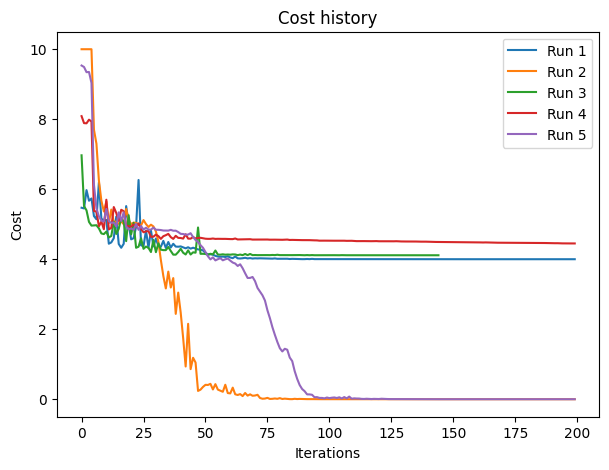

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost history')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
# Add your code here
# Plot the cost history for each run
for i, cost_history in enumerate(cost_history_list):
    ax.plot(cost_history, label=f'Run {i + 1}')

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


In [42]:
def test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm):

    """Return the performance of the classifier

    Parameters:
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        list: List of test results
    """

      ### Write your code below here ###
    results_test = []
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])
        # Get result
        result = abs(job.result()[0].data.evs)

        # Store the result
        results_test.append(result)



    ### Don't change any code past this line ###
    return results_test

In [43]:
def compute_performance(result_list, list_labels):

    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        float: Performance of the classifier
    """
    ### Write your code below here ###
    # Calculate the sum of absolute differences between results and labels
    total_diff = np.sum([abs(result - label) for result, label in zip(result_list, list_labels)])

    # Normalize the sum by dividing by 2^5
    normalized_diff = total_diff / (2 ** 5)

    # Calculate the performance
    performance = 100 - 100 * normalized_diff

    ### Don't change any code past this line ###
    return performance

Performance for trial 0: 93.97555178184844
Performance for trial 1: 99.99999990785612
Performance for trial 2: 90.85954362890645
Performance for trial 3: 86.57582851919993
Performance for trial 4: 99.99999469572626


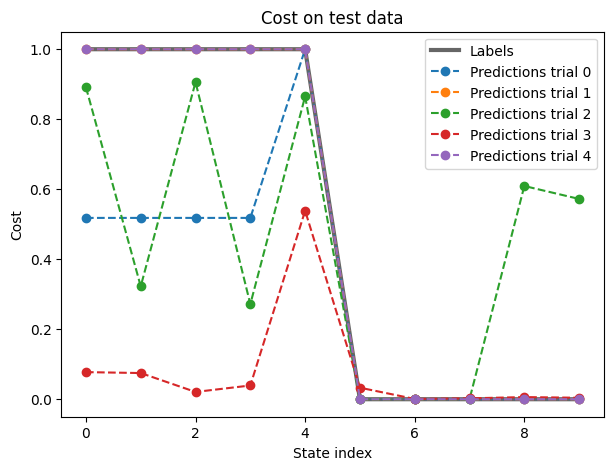

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

for index in range(len(res_list)):
    opt_params = res_list[index].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)
    print(f"Performance for trial {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions trial '+str(index))

ax.legend()

In [45]:
best_result_index = np.argmin([res.fun for res in res_list])

In [46]:
# Submit your answer using following code
best_result_index = np.argmin([res.fun for res in res_list])# Choose the index with the best result
grade_lab4_ex3(res_list[best_result_index]) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Performance: 100.00% > 90%
Congratulations! 🎉 Your answer is correct.


In [47]:
fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

In [48]:
def update_error_rate(backend, error_rates):

    """Updates the error rates of the backend

    Parameters:
        backend (BackendV2): Backend to update
        error_rates (dict): Dictionary of error rates

    Returns:
        None
    """

    default_duration=1e-8
    if "default_duration" in error_rates:
        default_duration = error_rates["default_duration"]

    # Update the 1-qubit gate properties
    for i in range(backend.num_qubits):
        qarg = (i,)
        if "rz_error" in error_rates:
            backend.target.update_instruction_properties('rz', qarg, InstructionProperties(error=error_rates["rz_error"], duration=default_duration))
        if "x_error" in error_rates:
            backend.target.update_instruction_properties('x', qarg, InstructionProperties(error=error_rates["x_error"], duration=default_duration))
        if "sx_error" in error_rates:
            backend.target.update_instruction_properties('sx', qarg, InstructionProperties(error=error_rates["sx_error"], duration=default_duration))
        if "measure_error" in error_rates:
            backend.target.update_instruction_properties('measure', qarg, InstructionProperties(error=error_rates["measure_error"], duration=default_duration))

    # Update the 2-qubit gate properties (CX gate) for all edges in the chosen coupling map
    if "cx_error" in error_rates:
        for edge in backend.coupling_map:
            backend.target.update_instruction_properties('cx', tuple(edge), InstructionProperties(error=error_rates["cx_error"], duration=default_duration))

In [49]:
error_rates = {
  "default_duration": 1e-8,
  "rz_error": 1e-8,
  "x_error": 1e-8,
  "sx_error": 1e-8,
  "measure_error": 1e-8,
  "cx_error": 1e-8
}

update_error_rate(fake_backend, error_rates)

Performance for run 4: 84.37652587890625
Performance for run 4: 86.78436279296875
Performance for run 4: 97.235107421875
Performance for run 4: 99.48577880859375


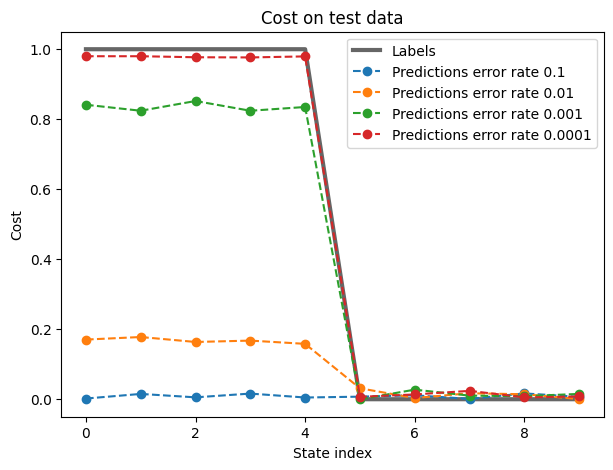

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

error_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]

fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

for error_rate_value in error_rate_list:
    update_error_rate(fake_backend, error_rates={
        "default_duration": 1e-8,
        "rz_error": error_rate_value,
        "x_error": 1e-8,
        "sx_error": 1e-8,
        "measure_error": 1e-8,
        "cx_error": error_rate_value
    })

    estimator = Estimator(backend=fake_backend)
    pm = generate_preset_pass_manager(optimization_level=1, backend=fake_backend)

    opt_params =res_list[best_result_index].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)

    print(f"Performance for run {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions error rate '+str(error_rate_value))

ax.legend()

In [51]:
# Submit your answer using following code
grade_lab4_ex4(fake_backend) # Expected answer type: BackendV2

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [53]:
# Choose a real backend
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86",
    set_as_default=True,
    overwrite=True,
)

service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

Depth of two-qubit gates:  52


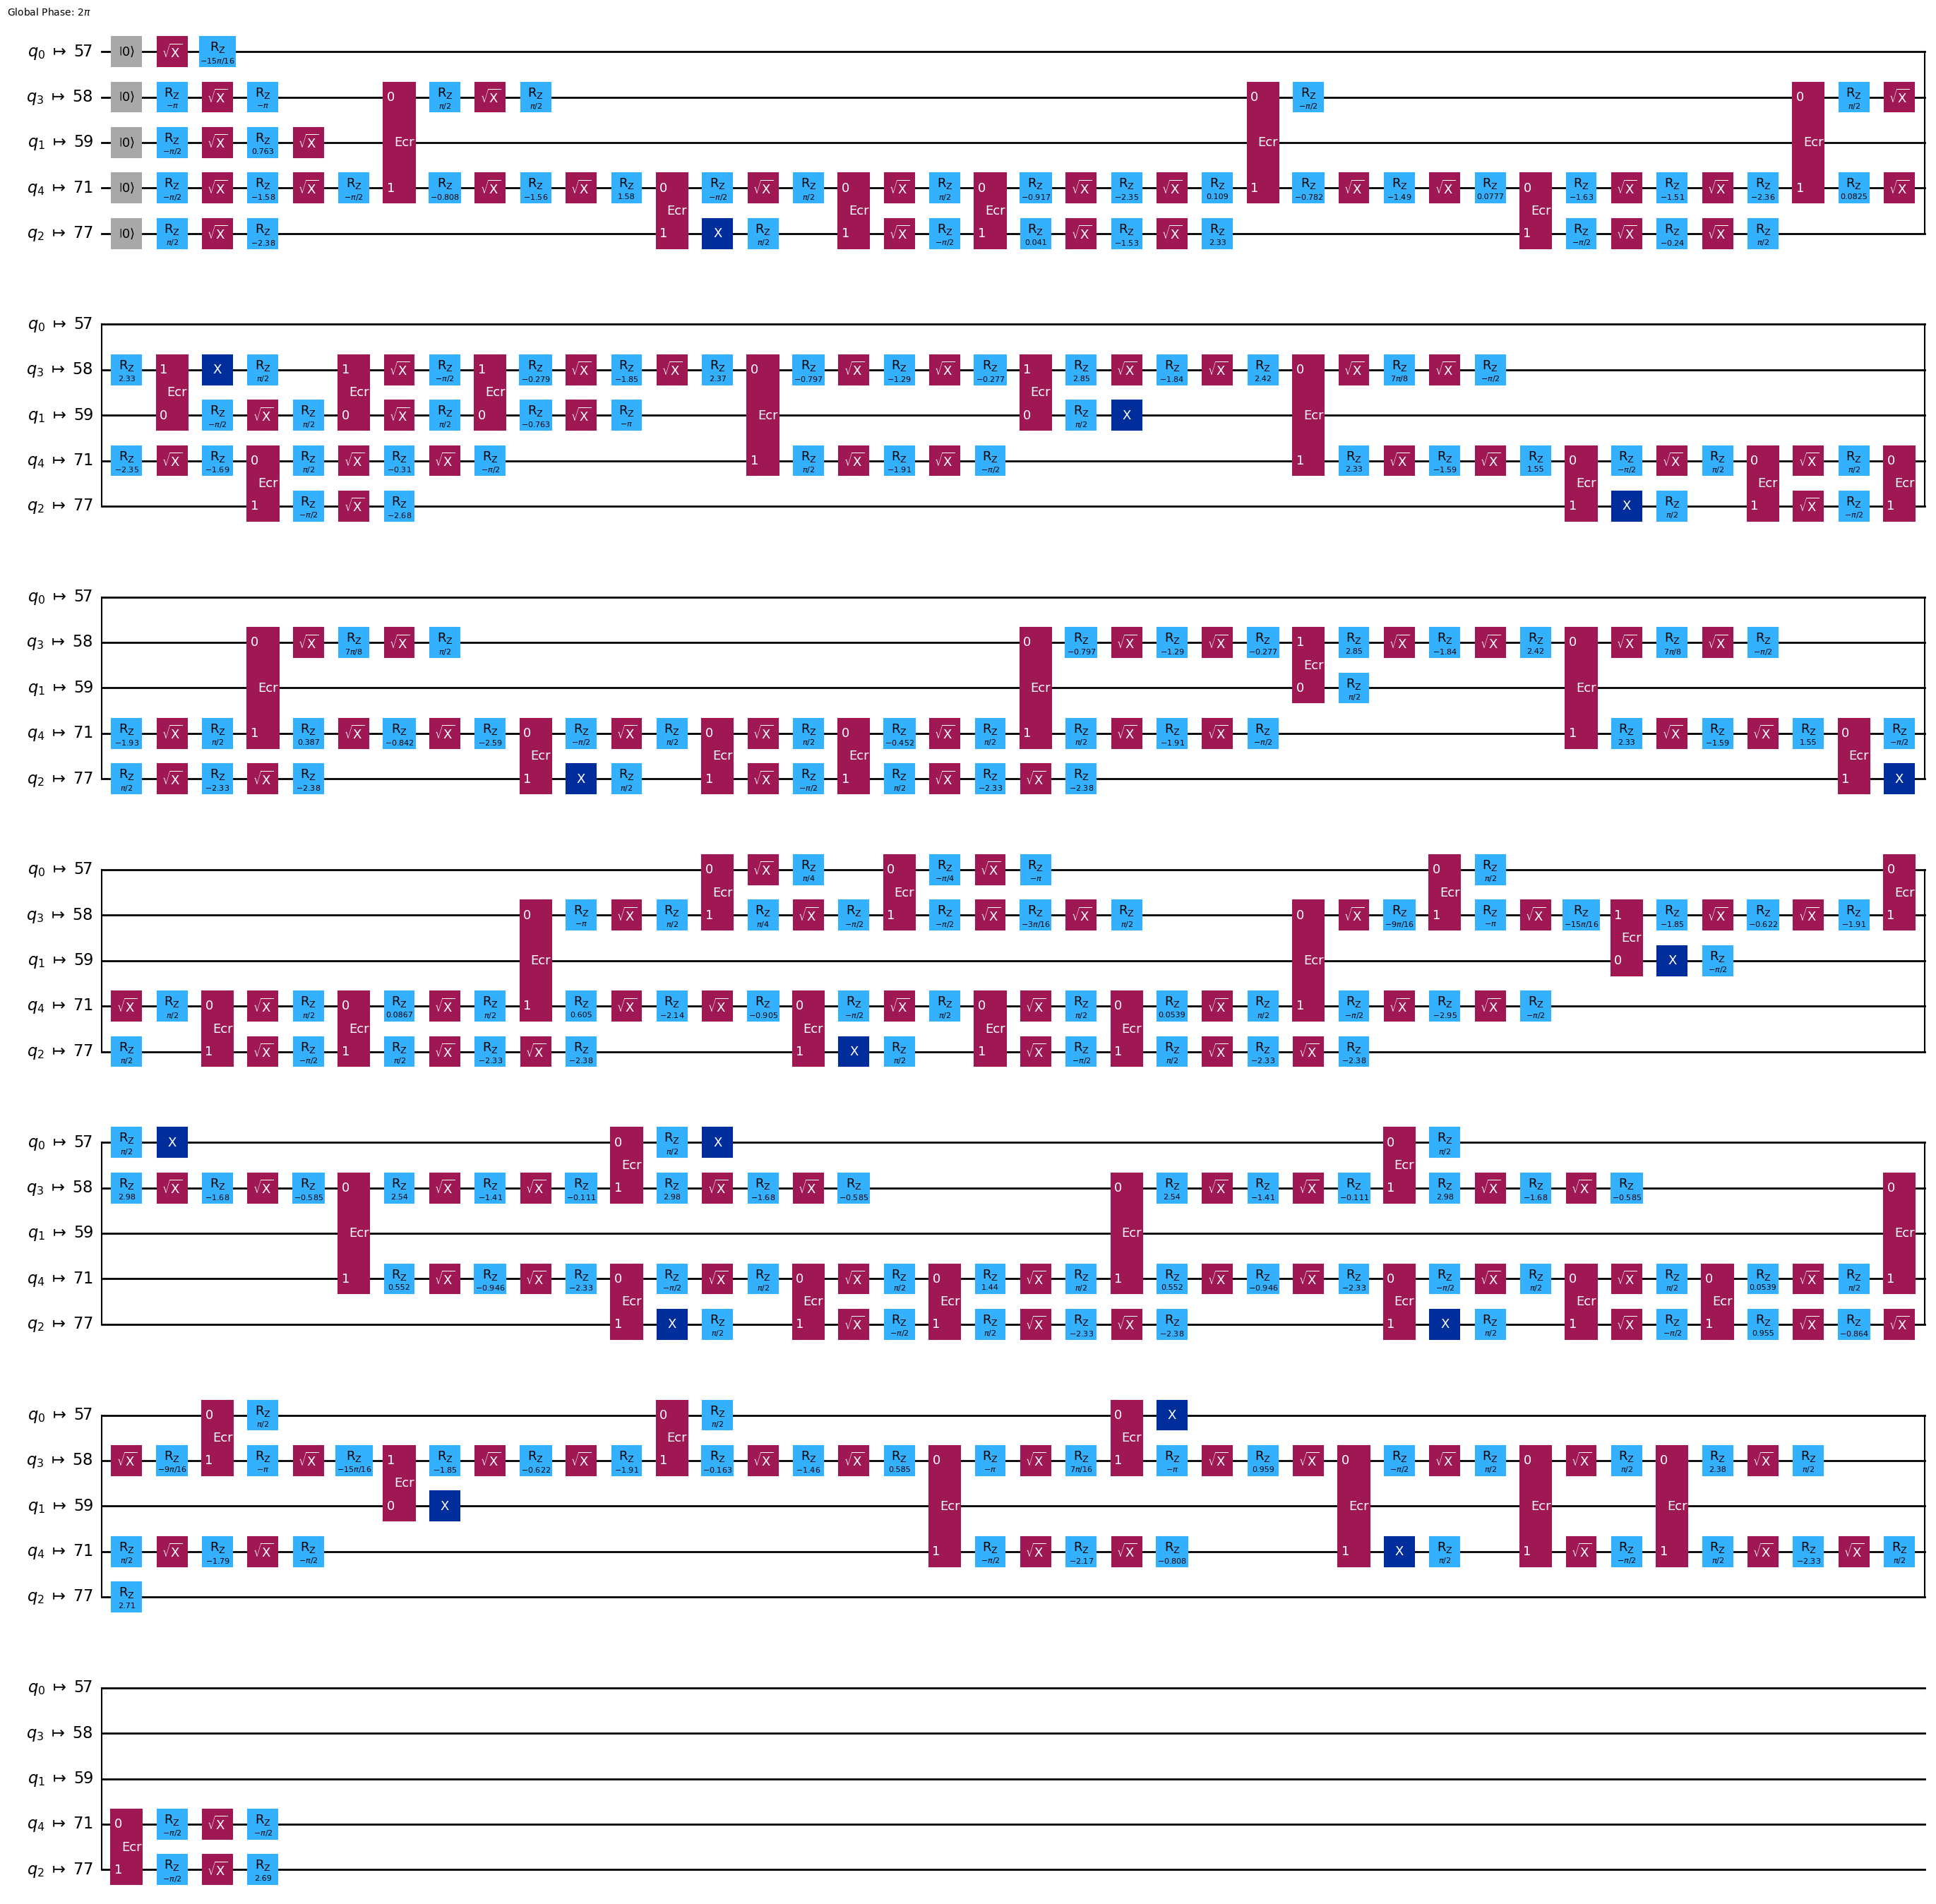

In [54]:
index_bird = 0 #you can check different birds by changing the index
qc = QuantumCircuit(num_qubits)
qc.initialize(list_coefficients[index_bird])
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", idle_wires=False, fold=40)

In [55]:
def amplitude_embedding(num_qubits, bird_index):
    """
    Create amplitude embedding circuit for a given bird index.

    Args:
        num_qubits (int): Number of qubits for the circuit.
        bird_index (int): Index of the bird in the dataset.

    Returns:
        QuantumCircuit: Quantum circuit with amplitude embedding.
    """
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1,num_qubits)):
            qc.cx(i, j)

    qc = QuantumCircuit(num_qubits)
    ### Write your code below here ###
    if bird_index < 5:
      generate_GHZ(qc)
    bit_str = format(bird_index,'0{0}b'.format(num_qubits))
    for i in reversed(range(len(bit_str))):
      if bit_str[i] == '1':
        qc.x(num_qubits-1-i)
    ### Don't change any code past this line ###
    return qc

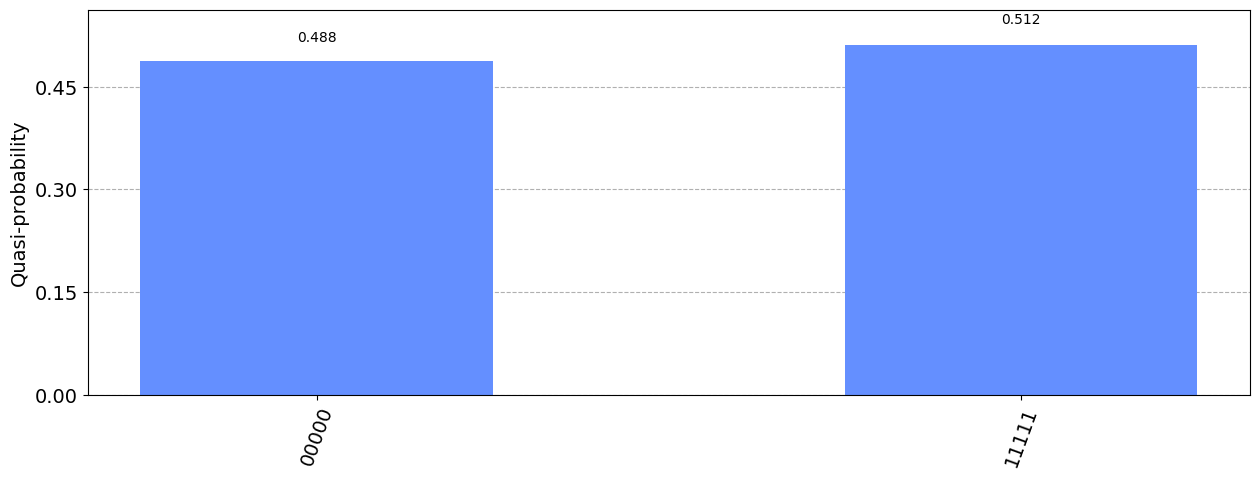

In [56]:
index_bird = 0 # You can check different birds by changing the index

# Build the amplitude embedding
qc = amplitude_embedding(num_qubits, index_bird)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(15, 5))

Depth of two-qubit gates:  4


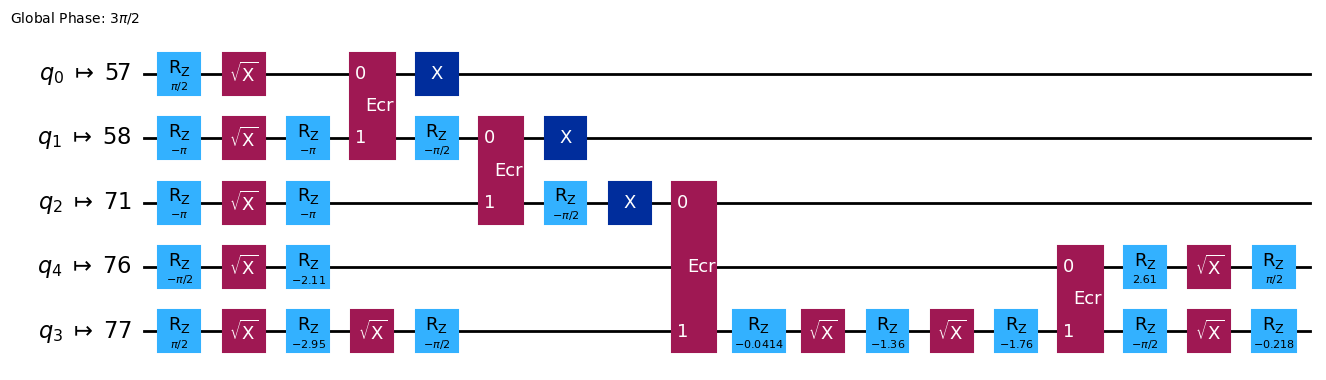

In [57]:
index_bird = 0 #You can check different birds by changing the index
qc = amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [58]:
# Submit your answer using following code
grade_lab4_ex5(amplitude_embedding) # Expected answer type Callable

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Depth of two-qubit gates:  18


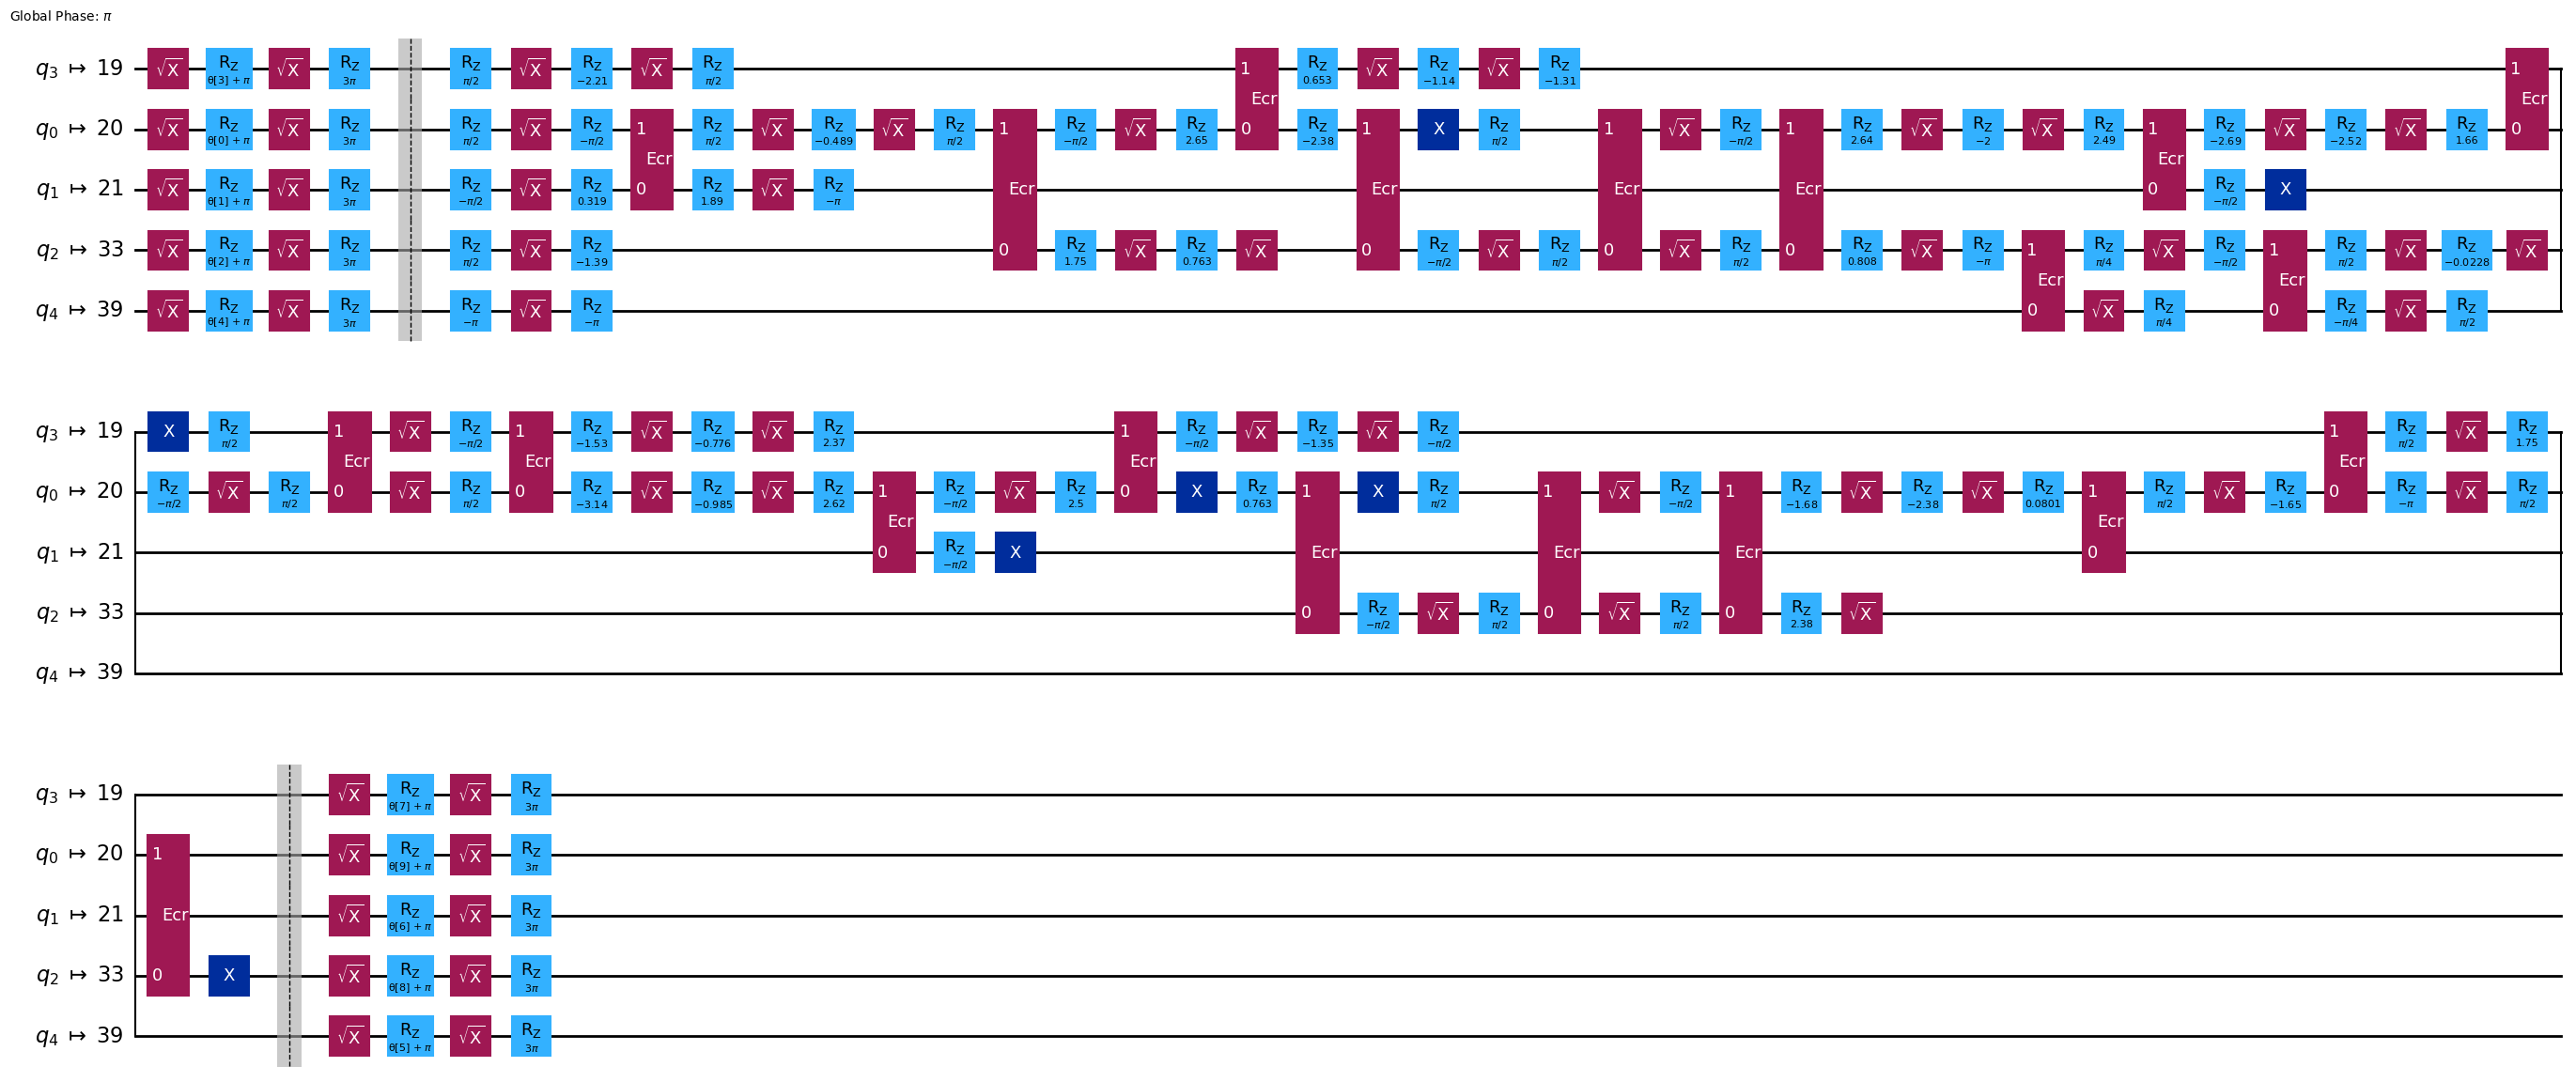

In [59]:
old_ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='full', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(old_ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", idle_wires=False, fold=40)

Depth of two-qubit gates:  2


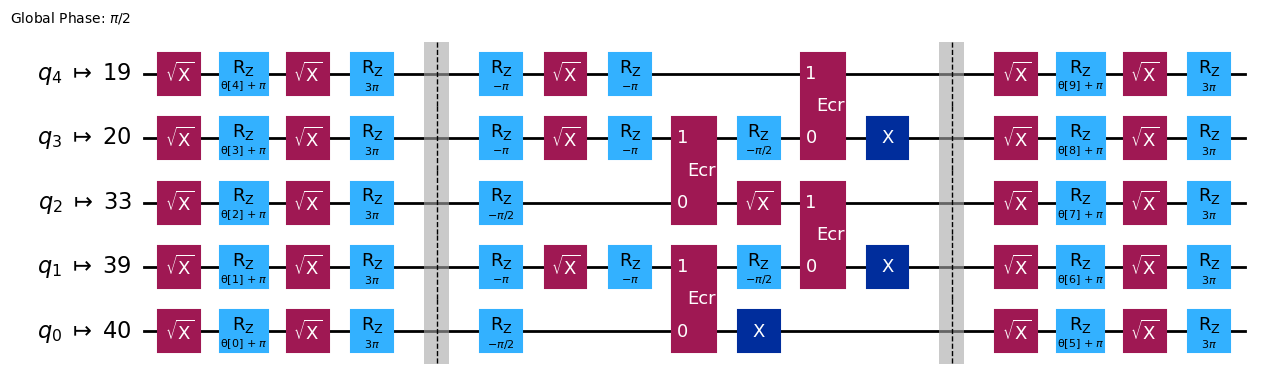

In [60]:
ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='pairwise', insert_barriers=True)# Add your code here
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)# Add your code here
transpiled_ansatz = pm.run(ansatz)# Add your code here

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", fold=False, idle_wires=False)

In [61]:
old_mapping = QuantumCircuit(num_qubits)
old_mapping.initialize(list_coefficients[index_bird])
old_classifier = old_mapping.compose(old_ansatz)

new_mapping = amplitude_embedding(num_qubits, index_bird)
new_classifier = new_mapping.compose(ansatz)

pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
old_transpiled_classifier = pm.run(old_classifier)
new_transpiled_classifier = pm.run(new_classifier)

print('Old depth of two-qubit gates: ', old_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))
print('Current depth of two-qubit gates: ', new_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))

Old depth of two-qubit gates:  66
Current depth of two-qubit gates:  6


In [62]:
def test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm):

    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        results_test (list): List of test results
    """
    ### Write your code below here ###
    results_test = []
    for bird_index, label in enumerate(list_labels):
      qc = QuantumCircuit(num_qubits)
      new_mapping = amplitude_embedding(num_qubits, bird_index)
      classifier = new_mapping.compose(ansatz)
      transpiled_classifier = pm.run(classifier)
      transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
      pub = (transpiled_classifier, transpiled_obs, opt_params)
      job = estimator.run([pub])
      result = abs(job.result()[0].data.evs)
      results_test.append(result)

    ### Don't change any code past this line ###
    return results_test

Performance: 93.2891845703125


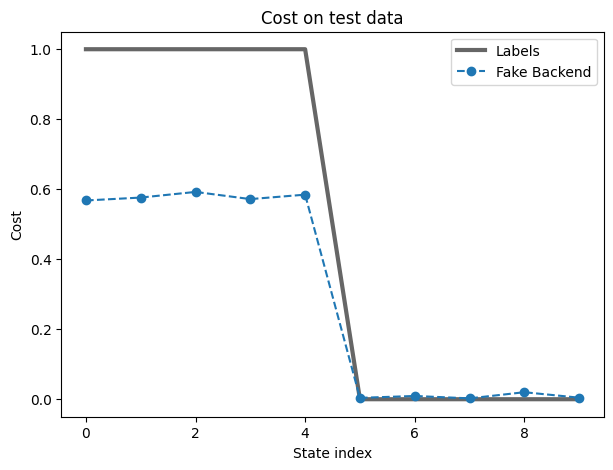

In [63]:
estimator = Estimator(backend=fake_backend)
estimator.options.default_shots = 5000
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)

opt_params = np.load('/content/drive/My Drive/Colab Notebooks/opt_params_shallow_VQC.npy') # Load optimal parameters
results_test = test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm)

print(f"Performance: {compute_performance(results_test, list_labels)}")

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')
ax.plot(results_test, 'o--', label='Fake Backend')
ax.legend()

In [64]:
# Submit your answer using following code
grade_lab4_ex6(results_test) # Expected answer type: list[float]

Submitting your answer. Please wait...
Performance: 78.53% > 70%
Congratulations! 🎉 Your answer is correct.


In [65]:
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

In [68]:
def test_shallow_VQC_QPU(list_labels, anstaz, obs, opt_params, options, backend):

    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Estimator options
        backend (service.backend): Backend to run the job

    Returns:
        job_id (str): Job ID
    """
 estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
      qc = QuantumCircuit(num_qubits)
      new_mapping = amplitude_embedding(num_qubits, bird)
      classifier = new_mapping.compose(ansatz)
      transpiled_classifier = pm.run(classifier)
      transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)

      ### Don't change any code past this line ###
      pub = (transpiled_classifier, transpiled_obs, opt_params)
      pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    return job_id


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [69]:
def test_shallow_VQC_QPU(list_labels, anstaz, obs, opt_params, options, backend):

    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Estimator options
        backend (service.backend): Backend to run the job

    Returns:
        job_id (str): Job ID
    """
    # The following line had an incorrect indentation
    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
      qc = QuantumCircuit(num_qubits)
      new_mapping = amplitude_embedding(num_qubits, bird)
      classifier = new_mapping.compose(ansatz)
      transpiled_classifier = pm.run(classifier)
      transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)

      ### Don't change any code past this line ###
      pub = (transpiled_classifier, transpiled_obs, opt_params)
      pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    return job_id

In [70]:
## No DD, no TREX (no ZNE)
options_0 = EstimatorOptions()
options_0.optimization_level =0
options_0.resilience_level = 0
options_0.default_shots = 5000
options_0.dynamical_decoupling.enable = False
options_0.dynamical_decoupling.sequence_type = 'XpXm'
options_0.twirling.enable_measure = False  #Add your code here

## DD + TREX (no ZNE)
options_1 = EstimatorOptions()
options_1.optimization_level =0
options_1.resilience_level = 1
options_1.default_shots = 5000
options_1.dynamical_decoupling.enable = True
options_1.dynamical_decoupling.sequence_type = 'XpXm'
options_1.twirling.enable_measure = False #Add your code here

In [71]:
# Submit your answer using following code
grade_lab4_ex7(options_0, options_1) # Expected answer type: EstimatorOptions, EstimatorOptions

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [72]:
def retrieve_job(job_id):

    ''' Retrieve results from job_id '''

    job = service.job(job_id)

    results_test = []
    errors_test = []
    for result in job.result():
        results_test.append(abs(result.data.evs))
        errors_test.append(abs(result.data.stds))

    return results_test, errors_test

In [73]:
## No DD, no TREX (no ZNE)
job_id_0 = test_shallow_VQC_QPU(list_labels, ansatz, obs, opt_params, options_0, backend)

## DD + TREX (no ZNE)
job_id_1 = test_shallow_VQC_QPU(list_labels, ansatz, obs, opt_params, options_1, backend)

Job ID: csmwakjvnxy0008dafw0
Status: QUEUED
Job ID: csmwamavwqp0008azqjg
Status: QUEUED


Performance for no DD + no TREX: 94.882
Performance for DD + TREX: 89.117


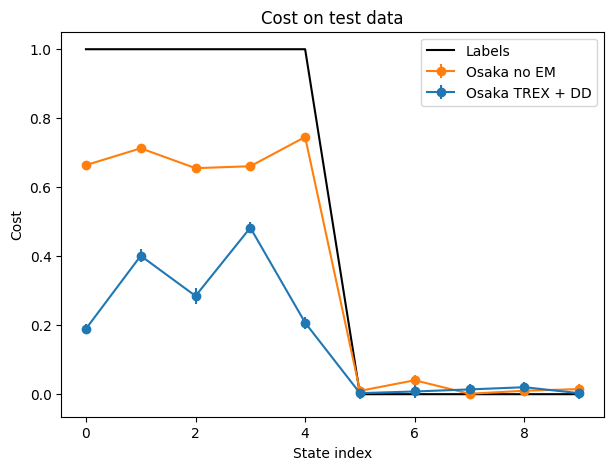

In [74]:
results_test_0_DD, errors_test_0_DD = retrieve_job('csmwakjvnxy0008dafw0') #(Add job_id 0 here)
results_test_1_DD, errors_test_1_DD = retrieve_job('csmwamavwqp0008azqjg') #(Add job_id 1 here)

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

print(f"Performance for no DD + no TREX: {compute_performance(results_test_0_DD, list_labels):.3f}")
print(f"Performance for DD + TREX: {compute_performance(results_test_1_DD, list_labels):.3f}")
ax.errorbar(range(10), results_test_0_DD, fmt='-o', yerr=errors_test_0_DD, color='tab:orange', label='Osaka no EM')
ax.errorbar(range(10), results_test_1_DD, fmt='-o',  yerr=errors_test_1_DD, color='tab:blue', label='Osaka TREX + DD')

ax.plot(list_labels, 'k-', label='Labels')

ax.legend()